**Data Preprocessing:**

In [30]:
# import main data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Since we have different algorithms, we use different sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#Load data and view the first three rows.
data = pd.read_csv("/content/Customer behaviour Tourism.csv")
data.head(3)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0


In [5]:
#Checking shape of the data
data.shape

#They are 11760 rows and 17 columns

(11760, 17)

In [6]:
#Check the data types.
data.dtypes

#Dataset consist of object, float64 and int64 data types.

UserID                                            int64
Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                   object
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                      float64
Daily_Avg_mins_spend_on_traveling_page          float64
dtype: object

In [7]:
#Checking the missing values in the dataset
data.isnull().sum()

#The dataset have missing values

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64



*   Yearly_avg_view_on_travel_page, total_likes_on_outstation_checkin_given, Yearly_avg_comment_on_travel_page , following_company_page have a very high number of missing values
*   Adult_flag, Daily_Avg_mins_spend_on_traveling_page, has very low number of missing values



In [8]:
#Handling missing values.
#imputing missing values
data['Yearly_avg_view_on_travel_page'] = data['Yearly_avg_view_on_travel_page'].fillna(value = (data['Yearly_avg_view_on_travel_page'].mean()))
data['total_likes_on_outstation_checkin_given'] = data['total_likes_on_outstation_checkin_given'].fillna(value = (data['total_likes_on_outstation_checkin_given'].mean()))
data['preferred_device'] = data['preferred_device'].fillna(value = (data['preferred_device'].mode()[0]))
data['yearly_avg_Outstation_checkins'] = data['yearly_avg_Outstation_checkins'].fillna(value = (data['yearly_avg_Outstation_checkins'].mode()[0]))
data['preferred_location_type'] = data['preferred_location_type'].fillna(value = (data['preferred_location_type']).mode()[0])
data['Yearly_avg_comment_on_travel_page'] = data['Yearly_avg_comment_on_travel_page'].fillna(value = data['Yearly_avg_comment_on_travel_page'].mean())
data['following_company_page'] = data['following_company_page'].fillna(value = data['following_company_page'].mode()[0])
data['Adult_flag'] = data['Adult_flag'].fillna(value = data['Adult_flag'].mode()[0])
data['Daily_Avg_mins_spend_on_traveling_page'] = data['Daily_Avg_mins_spend_on_traveling_page'].fillna(value = (data['Daily_Avg_mins_spend_on_traveling_page'].mean()))

In [9]:
#Verifying if they are still missing values
data.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

The missing values are handled,now the dataset doesn't consist of missing values

In [10]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Taken_product'] = labelencoder.fit_transform(data['Taken_product'])
data.head(3)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,1,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,0,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,1,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0


In [11]:
# Perform one-hot encoding for categorical variables
data_dummies = pd.get_dummies(data, columns = ['preferred_device','yearly_avg_Outstation_checkins','member_in_family',
                                               'preferred_location_type','following_company_page','working_flag'])
data_dummies.head(3)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,...,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_0,following_company_page_1,following_company_page_No,following_company_page_Yes,following_company_page_Yeso,working_flag_0,working_flag_No,working_flag_Yes
0,1000001,1,307.0,38570.0,94.0,5993,8,11,1,0.0,...,0,0,0,0,0,1,0,0,1,0
1,1000002,0,367.0,9765.0,61.0,5130,1,23,4,1.0,...,0,0,0,0,1,0,0,0,0,1
2,1000003,1,277.0,48055.0,92.0,2090,6,15,2,0.0,...,0,0,0,0,0,1,0,0,1,0


In [12]:
# Separate features and target variable
x = data_dummies.drop(['Taken_product'], axis=1)
y = data_dummies['Taken_product']
x.shape, y.shape

((11760, 80), (11760,))

**Feature Scaling:**

In [31]:
#Scale the features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,...,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_0,following_company_page_1,following_company_page_No,following_company_page_Yes,following_company_page_Yeso,working_flag_0,working_flag_No,working_flag_Yes
0,0.000000,0.634033,0.140641,0.112069,0.261545,0.727273,0.014113,0.000000,0.000000,0.029630,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000085,0.773893,0.024894,0.071429,0.216257,0.090909,0.038306,0.333333,0.333333,0.037037,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000170,0.564103,0.178755,0.109606,0.056728,0.545455,0.022177,0.111111,0.000000,0.025926,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000255,0.494172,0.181427,0.065271,0.099706,0.090909,0.014113,0.222222,0.000000,0.029630,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000340,0.389277,0.068774,0.045567,0.129041,0.818182,0.016129,0.333333,0.333333,0.022222,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Train-Test Split:**

In [14]:
# Splitting the data into training and testing sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

# Check the shapes of the resulting sets
print("Train set - Features:", train_x.shape, "Target:", train_y.shape)
print("Test set - Features:", test_x.shape, "Target:", test_y.shape)

Train set - Features: (8820, 80) Target: (8820,)
Test set - Features: (2940, 80) Target: (2940,)


**Build a k-NN Model:**

In [15]:
#Choosing the  suitable value of k.

# Define a range of k values to try
k_values = list(range(1, 61))  # Example range from 1 to 60

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# Initialize the k-NN regressor
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best value of k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_x, train_y)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value of k is: {best_k}")

The best value of k is: 1


In [16]:
# Choose an appropriate 'k' value
k_value = 1  # Appropriate value for k is 1

# Initialize the k-NN classifier with the chosen 'k'
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)

# Train the k-NN model using the training set
knn_classifier.fit(train_x, train_y)



KNeighborsClassifier(n_neighbors=1)

**Model Evaluation:**

In [27]:
# Predict using the trained k-NN model
pred_y = knn_classifier.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

# Other evaluation metrics
print(classification_report(test_y, pred_y))
print("Confusion Matrix:")
print(confusion_matrix(test_y,pred_y))


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2419
           1       0.69      0.25      0.37       521

    accuracy                           0.85      2940
   macro avg       0.77      0.61      0.64      2940
weighted avg       0.83      0.85      0.82      2940

Confusion Matrix:
[[2360   59]
 [ 390  131]]




*   The model shows high accuracy in predicting class 0 due to high precision and recall for that class.
However, for class 1, the precision, recall, and F1-score are notably lower, indicating a challenge in correctly predicting instances of class 1. The model might be biased towards class 0, as indicated by the imbalance in precision and recall between the two classes.

*   However, for class 1, the precision, recall, and F1-score are notably lower, indicating a challenge in correctly predicting instances of class 1. The model might be biased towards class 0, as indicated by the imbalance in precision and recall between the two classes.



In [19]:
# Since we  have the trained model 'knn_classifier'
pred_y = knn_classifier.predict(test_x)

# Calculate relevant classification metrics
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")



Accuracy: 0.9728
Precision: 0.9455
Recall: 0.8983
F1-score: 0.9213


In [25]:
#Define a Range of 'k' Values
k_values = [1,3, 5, 7, 9, 11]  # Example values to experiment with

#Loop Through 'k' Values and Evaluate Metrics

for k in k_values:
    # Initialize k-NN classifier with the current 'k' value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier using the training set
    knn_classifier.fit(train_x, train_y)

    # Make predictions on the testing set
    pred_y = knn_classifier.predict(test_x)

    # Calculate accuracy for each 'k' value
    accuracy = accuracy_score(test_y, pred_y)
    print(f"k = {k}: Accuracy = {accuracy:.4f}")



k = 1: Accuracy = 0.9728
k = 3: Accuracy = 0.9306
k = 5: Accuracy = 0.8793
k = 7: Accuracy = 0.8490
k = 9: Accuracy = 0.8531
k = 11: Accuracy = 0.8473


**Interpretation of Accuracy Scores for Different 'k' Values:**
k = 1: Accuracy = 0.9728: When considering only the nearest neighbor, the model achieves a high accuracy of 97.28%. This might indicate that the model is overly sensitive to noise or outliers, potentially causing overfitting to the training data.

k = 3: Accuracy = 0.9306: With three neighbors, the accuracy slightly decreases to 93.06%. This suggests a slight reduction in overfitting compared to 'k = 1', potentially resulting in a more generalized model.

k = 5: Accuracy = 0.8793: As 'k' increases to 5, the accuracy drops further to 87.93%. This decrease might indicate that the model might be missing some patterns or information due to a broader consideration of neighbors.

k = 7: Accuracy = 0.8490: Continuing to increase 'k' to 7 leads to a further decrease in accuracy to 84.90%. This suggests that with more neighbors, the model might be losing some important information or complexity needed to classify correctly.

k = 9: Accuracy = 0.8531: 'k' of 9 shows a slight increase in accuracy compared to 'k = 7'. It's possible that this 'k' value captures a bit more information, but not substantially compared to 'k = 7'.

k = 11: Accuracy = 0.8473: The accuracy further decreases at 'k = 11' to 84.73%, indicating a continuation of the trend where the model's performance decreases with higher 'k' values.

**Visualization:**

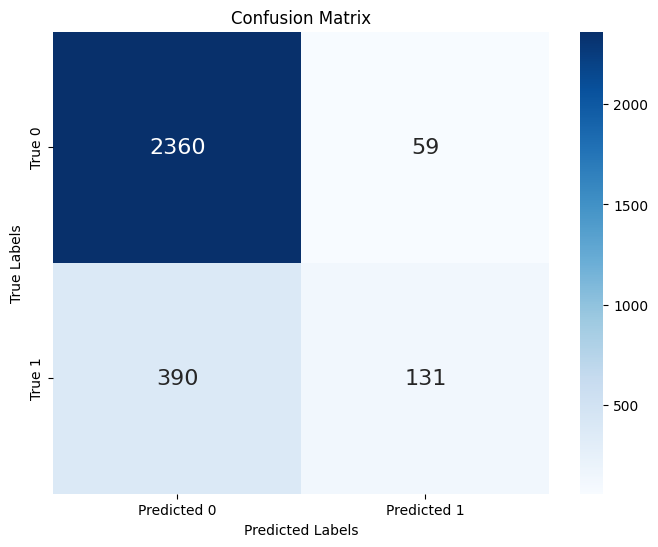

In [28]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['True 0', 'True 1'])
plt.show()
